In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pingouin as pg


## Skenario Masalah: Hubungan yang Membingungkan

In [18]:
# Simulasi data
np.random.seed(42)
n_karyawan = 150
pendidikan_tahun = np.random.randint(12, 19, size=n_karyawan)
pengalaman_kerja = -0.5 * pendidikan_tahun + np.random.normal(loc=15, scale=3, size=n_karyawan)
pengalaman_kerja = np.clip(pengalaman_kerja, 1, 25).round(1)
gaji_juta_rp = (2.5 * pendidikan_tahun) + (0.2 * pengalaman_kerja) + np.random.normal(loc=5, scale=2, size=n_karyawan)
gaji_juta_rp = np.clip(gaji_juta_rp, 10, 80).round(1)

df = pd.DataFrame({
    'pengalaman_kerja': pengalaman_kerja,
    'pendidikan_tahun': pendidikan_tahun,
    'gaji_juta_rp': gaji_juta_rp
})

df.head()

pengalaman_kerja  pendidikan_tahun  gaji_juta_rp
0               1.3                18          48.5
1               9.4                15          42.3
2               1.0                16          47.0
3               9.2                18          50.9
4               5.2                14          41.9

## Korelasi Sederhana: Pandangan yang Menyesatkan

In [20]:
### -----  Matriks Korelasi Bivariate (Sederhana):") ----- ###
df.corr()

pengalaman_kerja  pendidikan_tahun  gaji_juta_rp
pengalaman_kerja          1.000000         -0.329032     -0.142366
pendidikan_tahun         -0.329032          1.000000      0.891168
gaji_juta_rp             -0.142366          0.891168      1.000000

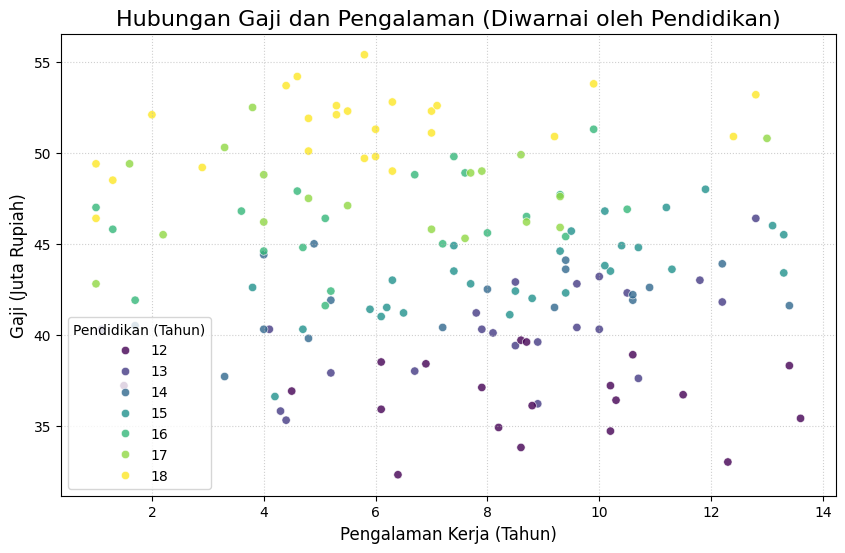

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pengalaman_kerja', y='gaji_juta_rp', hue='pendidikan_tahun', palette='viridis', alpha=0.8)
plt.title('Hubungan Gaji dan Pengalaman (Diwarnai oleh Pendidikan)', fontsize=16)
plt.xlabel('Pengalaman Kerja (Tahun)', fontsize=12)
plt.ylabel('Gaji (Juta Rupiah)', fontsize=12)
plt.legend(title='Pendidikan (Tahun)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

## Implementasi Manual Langkah-demi-Langkah dengan Python

### Langkah 1: “Bersihkan” Pengalaman dari Pengaruh Pendidikan

In [24]:
# Definisikan variabel dependen (X) dan independen/kontrol (Z)
X = df['pengalaman_kerja']
Z = sm.add_constant(df['pendidikan_tahun']) # Tambahkan konstanta untuk intercept

# Lakukan model regresi linear: Pengalaman ~ Pendidikan
model_pengalaman = sm.OLS(X, Z).fit()
df['res_pengalaman'] = model_pengalaman.resid
df.head()

pengalaman_kerja  pendidikan_tahun  gaji_juta_rp  res_pengalaman
0               1.3                18          48.5       -4.528244
1               9.4                15          42.3        1.996324
2               1.0                16          47.0       -5.878532
3               9.2                18          50.9        3.371756
4               5.2                14          41.9       -2.728820

### Langkah 2: “Bersihkan” Gaji dari Pengaruh Pendidikan

In [26]:
# Definisikan variabel dependen (Y)
Y = df['gaji_juta_rp']

# Lakukan model regresi linear: Gaji ~ Pendidikan
model_gaji = sm.OLS(Y, Z).fit()
df['res_gaji'] = model_gaji.resid
df.head()

pengalaman_kerja  pendidikan_tahun  gaji_juta_rp  res_pengalaman  res_gaji
0               1.3                18          48.5       -4.528244 -2.335268
1               9.4                15          42.3        1.996324 -1.640789
2               1.0                16          47.0       -5.878532  0.761051
3               9.2                18          50.9        3.371756  0.064732
4               5.2                14          41.9       -2.728820  0.257370

## Langkah 3: Korelasikan Kedua Residual

In [28]:
# Hitung korelasi Pearson sederhana antara kedua residual
korelasi_manual_parsial = df['res_pengalaman'].corr(df['res_gaji'])

print(f"Hasil Korelasi Parsial (Manual dari Residual): r = {korelasi_manual_parsial:.4f}")

Hasil Korelasi Parsial (Manual dari Residual): r = 0.3521


## Validasi dengan Library: Jalan Pintas yang Kini Dapat Kita Percayai

In [29]:
# Hitung korelasi parsial menggunakan library
korelasi_parsial_df = pg.partial_corr(data=df, x='pengalaman_kerja', y='gaji_juta_rp', covar='pendidikan_tahun')

### ----- Hasil Korelasi Parsial (dari Library Pingouin):")------ ####
korelasi_parsial_df

n         r        CI95%     p-val
pearson  150  0.352128  [0.2, 0.49]  0.000011